<a href="https://colab.research.google.com/github/yagohilario1992/Data_Science/blob/main/Analise_explorat%C3%B3ria_de_dados_do_Airbnb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id - Número de id gerado para identificar o imóvel.
* name - nome da propriedade anunciada.
* host_id - Número de id do porprietario (anfitrião)da propriedade.
* host_name - Nome do proprietario.
* neightbourhood_group - Não contém nenhum valor válido.
* neightbourhood - Nome do Bairro.
* latitude - Coordenada de latitude da propriedade.
* longitude - Coordenada de longetude da propriedade.
* room_type - Tipo de quarto oferecido.
* price - Preço do aluguel.
* minimum_nights - Quantidade minima de noite para reserva.
* number_of_reviews - Número de avaliações do imovel. 
* last_review - Data da ultima avaliação.
* reviews_per_month - Número de avaliações por mês.
* calculated_host_listing_count - Quantidade de imóveis do mesmo anfitrião.
* availability_365 - Número de dias disponivéis dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos neste topico indentificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas: 25784
Variáveis: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
+ É possivel ver que a coluna `neighbourhood_group ` não possue valores.
+ s variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
+ As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.385200
last_review                       0.385200
name                              0.001125
host_name                         0.000310
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para indentificar a distribuição das variáveis, usaremos o histograma.

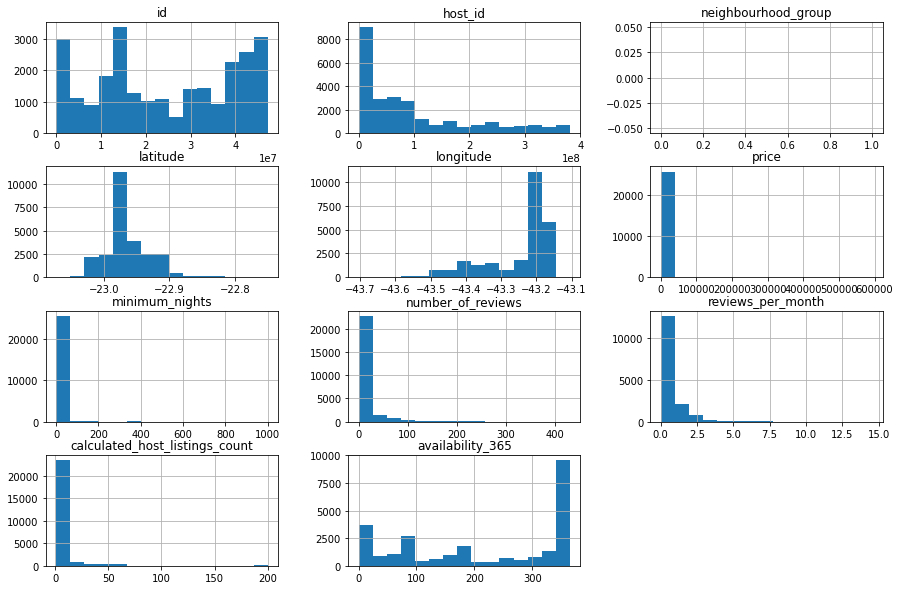

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver a média da coluna `price``
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
+ A variável `*price*` possui 75% do valor abaixo de 776, porém seu valor máximo é de 593266.
+ A quantidade mínima de noites `(*minimum_nights*)` está acima de 365 dias no ano.

### Boxplot para minimum_nights

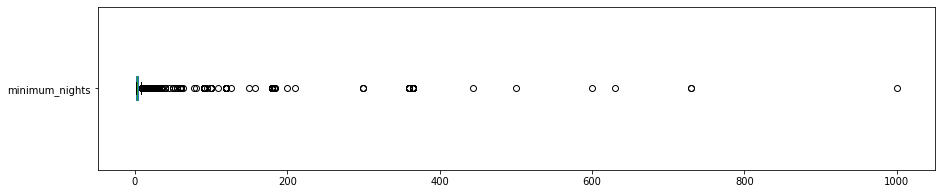

minimum_nights: valores acima de 30:
entradas 199
0.7718%


In [ ]:
# minimum_nigths
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print(f'entradas {len(df[df.minimum_nights > 30])}')
print(f'{(len(df[df.minimum_nights > 30]) / df.shape[0])*100:.4}%')

#### Boxplot para price

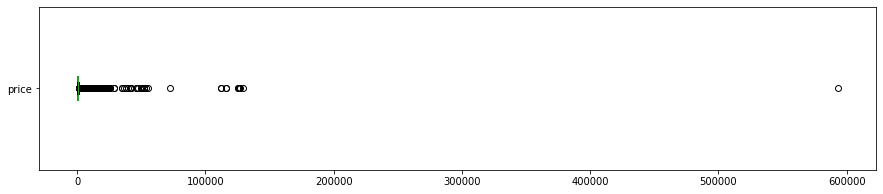


price: valores acima de 1500
2455 entradas
9.5214%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma

Para a limpeza desses dados vamos remover `price` acima de 1500 e `minimum_nights` acima de 30.

também será removida a coluna `neighbourhood_group` visto que a mesma não possue valores.

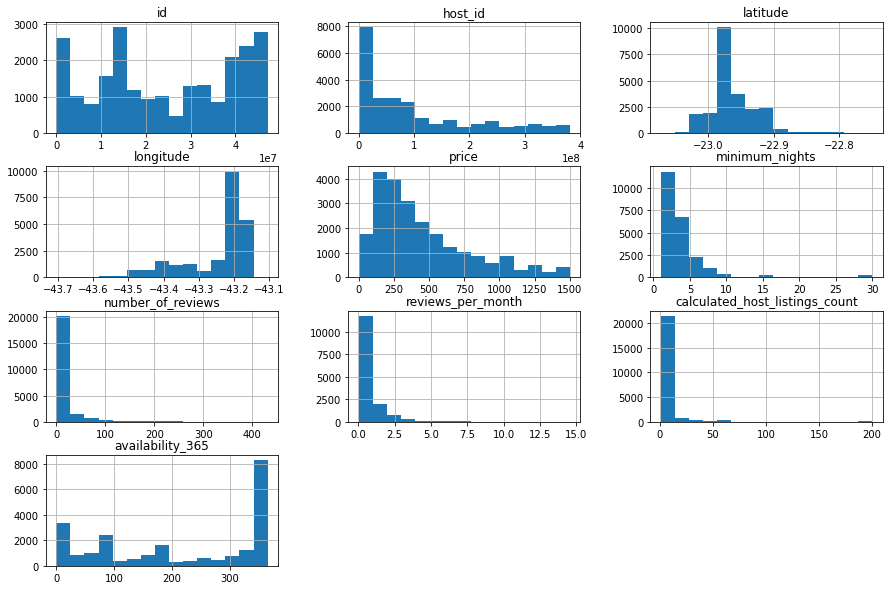

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.093798,-0.079755,-0.075201,0.171244,0.049127
minimum_nights,0.093798,1.000000,-0.069582,-0.102222,-0.029608,-0.002706
number_of_reviews,-0.079755,-0.069582,1.000000,0.644582,-0.034952,-0.076313
reviews_per_month,-0.075201,-0.102222,0.644582,1.000000,0.003108,-0.154244
calculated_host_listings_count,0.171244,-0.029608,-0.034952,0.003108,1.000000,0.008742
availability_365,0.049127,-0.002706,-0.076313,-0.154244,0.008742,1.000000


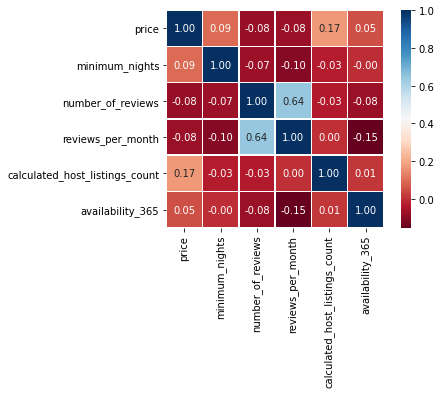

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linewidths=.5, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você ja alugou no site, sabe que existem opções de apartamentos/casa inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de alguel, usando o `método value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16201
Private room        6268
Shared room          579
Hotel room           105
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.699737
Private room       0.270721
Shared room        0.025008
Hotel room         0.004535
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se veirificar uma variável em função da outra é usandos `groupby()`. No caso, queremos comparar os bairros (neghtbourhoods) a partir do preço de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:25]

neighbourhood
Vista Alegre                1262.000000
Grumari                     1003.000000
Cavalcanti                   925.000000
Anchieta                     800.000000
Vaz Lobo                     797.000000
Cacuia                       795.000000
Osvaldo Cruz                 780.000000
Leblon                       650.875000
Ipanema                      599.598925
Lagoa                        593.735577
Manguinhos                   593.000000
Freguesia (Ilha)             580.666667
Barra da Tijuca              545.961839
Realengo                     543.200000
Vigário Geral                532.500000
Alto da Boa Vista            526.814815
Complexo do Alemão           520.000000
Recreio dos Bandeirantes     500.772864
Barra de Guaratiba           487.081633
Gardênia Azul                477.312500
Gávea                        475.196319
Pavuna                       471.000000
Jacarepaguá                  462.705255
Copacabana                   457.222966
Maracanã                  

Acima, vemos que bairos como Vista Alegre, Grumari e Cavalcanti estão com média de preço superior a de lugares com Leblon, Barra da tijuca e Copacabana.

Sendo assim vamos verificar quantas entradas há a fim de termos uma melhor ideia do que pode estar ocorendo.

In [ ]:
# ver quantidade de imóveis no Vista Alegre
print(df_clean[df_clean.neighbourhood == "Vista Alegre"].shape)

# ver a entrada do Vista Alegre
df_clean[df_clean.neighbourhood == "Vista Alegre"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7923,13654995,Cozy colonial style room,79273288,Sérgio,Vista Alegre,-22.8286,-43.31916,Private room,1262,1,1,2016-08-05,0.02,1,365


Neste caso podemos observar que Vista Alegre tem apenas um entrada, portanto este fato faz com que o paramentro da media fique destorcido uma vez que, outros bairros tem mais entradas e uma maior variedade de preços.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

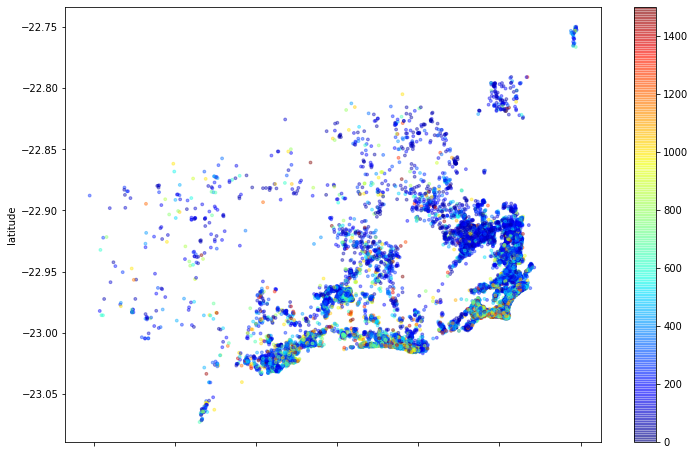

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:5]

neighbourhood
Padre Miguel    8.500000
Cascadura       8.166667
Paciência       8.000000
Vaz Lobo        8.000000
Cavalcanti      8.000000
Name: minimum_nights, dtype: float64

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.